In [32]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [33]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [34]:
df = df[['month_cos', 'month_sin', 'week_cos', 'week_sin', 'first']]

output = len(df['first'].unique())

In [36]:
X = df.drop('first', axis = 1)
y = df['first']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [37]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))
    
adadelta = Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 2000, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/2000
58/58 [==============================] - 1s 8ms/step - loss: 3.2838 - accuracy: 0.0297 - val_loss: 3.2615 - val_accuracy: 0.0923
Epoch 2/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2796 - accuracy: 0.0385 - val_loss: 3.2611 - val_accuracy: 0.0923
Epoch 3/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2678 - accuracy: 0.0460 - val_loss: 3.2606 - val_accuracy: 0.0923
Epoch 4/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2872 - accuracy: 0.0528 - val_loss: 3.2601 - val_accuracy: 0.0923
Epoch 5/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2877 - accuracy: 0.0342 - val_loss: 3.2597 - val_accuracy: 0.0923
Epoch 6/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2742 - accuracy: 0.0423 - val_loss: 3.2592 - val_accuracy: 0.0954
Epoch 7/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2744 - accuracy: 0.0473 - val_loss: 3.2588 - val_accuracy: 0.0954
Epoch 

58/58 [==============================] - 0s 4ms/step - loss: 3.2283 - accuracy: 0.0840 - val_loss: 3.2364 - val_accuracy: 0.0985
Epoch 59/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2462 - accuracy: 0.0523 - val_loss: 3.2359 - val_accuracy: 0.0985
Epoch 60/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2356 - accuracy: 0.0747 - val_loss: 3.2355 - val_accuracy: 0.0985
Epoch 61/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2376 - accuracy: 0.0646 - val_loss: 3.2350 - val_accuracy: 0.0985
Epoch 62/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2415 - accuracy: 0.0698 - val_loss: 3.2346 - val_accuracy: 0.0985
Epoch 63/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2363 - accuracy: 0.0744 - val_loss: 3.2341 - val_accuracy: 0.0985
Epoch 64/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2443 - accuracy: 0.0690 - val_loss: 3.2337 - val_accuracy: 0.0985
Epoch 65/2000

58/58 [==============================] - 0s 4ms/step - loss: 3.2055 - accuracy: 0.0849 - val_loss: 3.2098 - val_accuracy: 0.1015
Epoch 116/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2099 - accuracy: 0.0719 - val_loss: 3.2093 - val_accuracy: 0.1015
Epoch 117/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.2028 - accuracy: 0.0779 - val_loss: 3.2088 - val_accuracy: 0.1015
Epoch 118/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.1909 - accuracy: 0.0911 - val_loss: 3.2083 - val_accuracy: 0.1015
Epoch 119/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1907 - accuracy: 0.0823 - val_loss: 3.2078 - val_accuracy: 0.1015
Epoch 120/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.2020 - accuracy: 0.0864 - val_loss: 3.2073 - val_accuracy: 0.1015
Epoch 121/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.1962 - accuracy: 0.0762 - val_loss: 3.2068 - val_accuracy: 0.1015
Epoch 1

Epoch 172/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.1599 - accuracy: 0.1007 - val_loss: 3.1790 - val_accuracy: 0.1046
Epoch 173/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.1754 - accuracy: 0.0877 - val_loss: 3.1785 - val_accuracy: 0.1046
Epoch 174/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1617 - accuracy: 0.1064 - val_loss: 3.1779 - val_accuracy: 0.1046
Epoch 175/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1641 - accuracy: 0.0997 - val_loss: 3.1773 - val_accuracy: 0.1046
Epoch 176/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1595 - accuracy: 0.1089 - val_loss: 3.1767 - val_accuracy: 0.1046
Epoch 177/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1525 - accuracy: 0.1069 - val_loss: 3.1761 - val_accuracy: 0.1046
Epoch 178/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1614 - accuracy: 0.1139 - val_loss: 3.1755 - val_accuracy:

Epoch 229/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1229 - accuracy: 0.1034 - val_loss: 3.1430 - val_accuracy: 0.1231
Epoch 230/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1207 - accuracy: 0.1011 - val_loss: 3.1423 - val_accuracy: 0.1231
Epoch 231/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1202 - accuracy: 0.1156 - val_loss: 3.1416 - val_accuracy: 0.1231
Epoch 232/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.1237 - accuracy: 0.1052 - val_loss: 3.1409 - val_accuracy: 0.1231
Epoch 233/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.1247 - accuracy: 0.1039 - val_loss: 3.1403 - val_accuracy: 0.1231
Epoch 234/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1115 - accuracy: 0.1008 - val_loss: 3.1396 - val_accuracy: 0.1231
Epoch 235/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.1108 - accuracy: 0.0949 - val_loss: 3.1389 - val_accuracy:

Epoch 286/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0859 - accuracy: 0.1068 - val_loss: 3.1026 - val_accuracy: 0.1169
Epoch 287/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.0723 - accuracy: 0.1397 - val_loss: 3.1019 - val_accuracy: 0.1108
Epoch 288/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0738 - accuracy: 0.1234 - val_loss: 3.1012 - val_accuracy: 0.1108
Epoch 289/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0810 - accuracy: 0.1052 - val_loss: 3.1004 - val_accuracy: 0.1077
Epoch 290/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0743 - accuracy: 0.1201 - val_loss: 3.0997 - val_accuracy: 0.1077
Epoch 291/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0550 - accuracy: 0.1064 - val_loss: 3.0990 - val_accuracy: 0.1077
Epoch 292/2000
58/58 [==============================] - 0s 5ms/step - loss: 3.0667 - accuracy: 0.1054 - val_loss: 3.0982 - val_accuracy:

Epoch 343/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0525 - accuracy: 0.1116 - val_loss: 3.0602 - val_accuracy: 0.1077
Epoch 344/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0076 - accuracy: 0.1229 - val_loss: 3.0595 - val_accuracy: 0.1077
Epoch 345/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.0374 - accuracy: 0.1162 - val_loss: 3.0587 - val_accuracy: 0.1077
Epoch 346/2000
58/58 [==============================] - 0s 3ms/step - loss: 3.0358 - accuracy: 0.1228 - val_loss: 3.0580 - val_accuracy: 0.1108
Epoch 347/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0217 - accuracy: 0.1297 - val_loss: 3.0573 - val_accuracy: 0.1108
Epoch 348/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0119 - accuracy: 0.1321 - val_loss: 3.0565 - val_accuracy: 0.1108
Epoch 349/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0440 - accuracy: 0.1115 - val_loss: 3.0558 - val_accuracy:

Epoch 400/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9704 - accuracy: 0.1228 - val_loss: 3.0197 - val_accuracy: 0.1077
Epoch 401/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9874 - accuracy: 0.1152 - val_loss: 3.0190 - val_accuracy: 0.1077
Epoch 402/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9780 - accuracy: 0.1152 - val_loss: 3.0184 - val_accuracy: 0.1077
Epoch 403/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9740 - accuracy: 0.1337 - val_loss: 3.0177 - val_accuracy: 0.1077
Epoch 404/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9877 - accuracy: 0.1105 - val_loss: 3.0170 - val_accuracy: 0.1077
Epoch 405/2000
58/58 [==============================] - 0s 4ms/step - loss: 3.0106 - accuracy: 0.1144 - val_loss: 3.0164 - val_accuracy: 0.1077
Epoch 406/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9914 - accuracy: 0.1146 - val_loss: 3.0157 - val_accuracy:

Epoch 457/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9520 - accuracy: 0.1221 - val_loss: 2.9847 - val_accuracy: 0.1077
Epoch 458/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9481 - accuracy: 0.1228 - val_loss: 2.9842 - val_accuracy: 0.1077
Epoch 459/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9745 - accuracy: 0.1116 - val_loss: 2.9836 - val_accuracy: 0.1077
Epoch 460/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9659 - accuracy: 0.1150 - val_loss: 2.9831 - val_accuracy: 0.1077
Epoch 461/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9527 - accuracy: 0.1222 - val_loss: 2.9826 - val_accuracy: 0.1077
Epoch 462/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9542 - accuracy: 0.1080 - val_loss: 2.9820 - val_accuracy: 0.1077
Epoch 463/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9339 - accuracy: 0.1206 - val_loss: 2.9814 - val_accuracy:

Epoch 514/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9283 - accuracy: 0.1161 - val_loss: 2.9566 - val_accuracy: 0.1077
Epoch 515/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9355 - accuracy: 0.1282 - val_loss: 2.9562 - val_accuracy: 0.1077
Epoch 516/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8953 - accuracy: 0.1497 - val_loss: 2.9558 - val_accuracy: 0.1077
Epoch 517/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9279 - accuracy: 0.1360 - val_loss: 2.9554 - val_accuracy: 0.1077
Epoch 518/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9286 - accuracy: 0.1091 - val_loss: 2.9550 - val_accuracy: 0.1077
Epoch 519/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9153 - accuracy: 0.1280 - val_loss: 2.9545 - val_accuracy: 0.1077
Epoch 520/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9251 - accuracy: 0.1143 - val_loss: 2.9541 - val_accuracy:

58/58 [==============================] - 0s 4ms/step - loss: 2.9210 - accuracy: 0.1140 - val_loss: 2.9358 - val_accuracy: 0.1077
Epoch 571/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9117 - accuracy: 0.1145 - val_loss: 2.9355 - val_accuracy: 0.1077
Epoch 572/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9003 - accuracy: 0.1372 - val_loss: 2.9352 - val_accuracy: 0.1077
Epoch 573/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9209 - accuracy: 0.1163 - val_loss: 2.9348 - val_accuracy: 0.1077
Epoch 574/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9425 - accuracy: 0.1185 - val_loss: 2.9346 - val_accuracy: 0.1077
Epoch 575/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9053 - accuracy: 0.1353 - val_loss: 2.9343 - val_accuracy: 0.1077
Epoch 576/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9062 - accuracy: 0.1318 - val_loss: 2.9340 - val_accuracy: 0.1077
Epoch 5

Epoch 627/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9017 - accuracy: 0.1135 - val_loss: 2.9204 - val_accuracy: 0.1077
Epoch 628/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9012 - accuracy: 0.1219 - val_loss: 2.9202 - val_accuracy: 0.1077
Epoch 629/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.9212 - accuracy: 0.1139 - val_loss: 2.9200 - val_accuracy: 0.1077
Epoch 630/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9039 - accuracy: 0.1319 - val_loss: 2.9197 - val_accuracy: 0.1077
Epoch 631/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9188 - accuracy: 0.1129 - val_loss: 2.9195 - val_accuracy: 0.1077
Epoch 632/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8720 - accuracy: 0.1396 - val_loss: 2.9193 - val_accuracy: 0.1077
Epoch 633/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8885 - accuracy: 0.1267 - val_loss: 2.9190 - val_accuracy:

Epoch 684/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8982 - accuracy: 0.1158 - val_loss: 2.9089 - val_accuracy: 0.1077
Epoch 685/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8898 - accuracy: 0.1203 - val_loss: 2.9088 - val_accuracy: 0.1077
Epoch 686/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8799 - accuracy: 0.1232 - val_loss: 2.9086 - val_accuracy: 0.1077
Epoch 687/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8998 - accuracy: 0.1032 - val_loss: 2.9084 - val_accuracy: 0.1077
Epoch 688/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8905 - accuracy: 0.1153 - val_loss: 2.9082 - val_accuracy: 0.1077
Epoch 689/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8894 - accuracy: 0.1154 - val_loss: 2.9080 - val_accuracy: 0.1077
Epoch 690/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8502 - accuracy: 0.1141 - val_loss: 2.9078 - val_accuracy:

Epoch 741/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8690 - accuracy: 0.1220 - val_loss: 2.9000 - val_accuracy: 0.1231
Epoch 742/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8532 - accuracy: 0.1382 - val_loss: 2.8998 - val_accuracy: 0.1231
Epoch 743/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8610 - accuracy: 0.1193 - val_loss: 2.8997 - val_accuracy: 0.1231
Epoch 744/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8877 - accuracy: 0.1271 - val_loss: 2.8995 - val_accuracy: 0.1231
Epoch 745/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.9016 - accuracy: 0.1291 - val_loss: 2.8994 - val_accuracy: 0.1231
Epoch 746/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8888 - accuracy: 0.1130 - val_loss: 2.8993 - val_accuracy: 0.1231
Epoch 747/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8555 - accuracy: 0.1356 - val_loss: 2.8991 - val_accuracy:

Epoch 798/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8853 - accuracy: 0.1152 - val_loss: 2.8931 - val_accuracy: 0.1323
Epoch 799/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8588 - accuracy: 0.1336 - val_loss: 2.8930 - val_accuracy: 0.1323
Epoch 800/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8629 - accuracy: 0.1120 - val_loss: 2.8929 - val_accuracy: 0.1323
Epoch 801/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8658 - accuracy: 0.1389 - val_loss: 2.8928 - val_accuracy: 0.1323
Epoch 802/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8648 - accuracy: 0.1346 - val_loss: 2.8926 - val_accuracy: 0.1292
Epoch 803/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8695 - accuracy: 0.1337 - val_loss: 2.8925 - val_accuracy: 0.1262
Epoch 804/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8624 - accuracy: 0.1160 - val_loss: 2.8924 - val_accuracy:

Epoch 855/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8774 - accuracy: 0.1230 - val_loss: 2.8876 - val_accuracy: 0.1292
Epoch 856/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8631 - accuracy: 0.1150 - val_loss: 2.8875 - val_accuracy: 0.1292
Epoch 857/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8766 - accuracy: 0.1182 - val_loss: 2.8874 - val_accuracy: 0.1292
Epoch 858/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8753 - accuracy: 0.1152 - val_loss: 2.8874 - val_accuracy: 0.1292
Epoch 859/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8731 - accuracy: 0.1204 - val_loss: 2.8873 - val_accuracy: 0.1292
Epoch 860/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8691 - accuracy: 0.1119 - val_loss: 2.8872 - val_accuracy: 0.1292
Epoch 861/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8779 - accuracy: 0.1201 - val_loss: 2.8871 - val_accuracy:

Epoch 912/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8347 - accuracy: 0.1285 - val_loss: 2.8832 - val_accuracy: 0.1262
Epoch 913/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8402 - accuracy: 0.1273 - val_loss: 2.8831 - val_accuracy: 0.1262
Epoch 914/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8386 - accuracy: 0.1388 - val_loss: 2.8830 - val_accuracy: 0.1292
Epoch 915/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8281 - accuracy: 0.1319 - val_loss: 2.8830 - val_accuracy: 0.1292
Epoch 916/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8929 - accuracy: 0.1142 - val_loss: 2.8829 - val_accuracy: 0.1292
Epoch 917/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8616 - accuracy: 0.1438 - val_loss: 2.8828 - val_accuracy: 0.1292
Epoch 918/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8686 - accuracy: 0.1223 - val_loss: 2.8828 - val_accuracy:

Epoch 969/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8408 - accuracy: 0.1273 - val_loss: 2.8796 - val_accuracy: 0.1446
Epoch 970/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8556 - accuracy: 0.0957 - val_loss: 2.8795 - val_accuracy: 0.1446
Epoch 971/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8291 - accuracy: 0.1394 - val_loss: 2.8795 - val_accuracy: 0.1446
Epoch 972/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8563 - accuracy: 0.1283 - val_loss: 2.8794 - val_accuracy: 0.1446
Epoch 973/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8707 - accuracy: 0.1450 - val_loss: 2.8793 - val_accuracy: 0.1446
Epoch 974/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8873 - accuracy: 0.1070 - val_loss: 2.8793 - val_accuracy: 0.1446
Epoch 975/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8545 - accuracy: 0.1212 - val_loss: 2.8792 - val_accuracy:

Epoch 1026/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8369 - accuracy: 0.1342 - val_loss: 2.8764 - val_accuracy: 0.1446
Epoch 1027/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8443 - accuracy: 0.1363 - val_loss: 2.8763 - val_accuracy: 0.1446
Epoch 1028/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8498 - accuracy: 0.1205 - val_loss: 2.8763 - val_accuracy: 0.1415
Epoch 1029/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8308 - accuracy: 0.1282 - val_loss: 2.8762 - val_accuracy: 0.1415
Epoch 1030/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8566 - accuracy: 0.1239 - val_loss: 2.8762 - val_accuracy: 0.1415
Epoch 1031/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8535 - accuracy: 0.1074 - val_loss: 2.8761 - val_accuracy: 0.1415
Epoch 1032/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8465 - accuracy: 0.1238 - val_loss: 2.8761 - val_ac

58/58 [==============================] - 0s 3ms/step - loss: 2.8411 - accuracy: 0.1207 - val_loss: 2.8739 - val_accuracy: 0.1446
Epoch 1083/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8689 - accuracy: 0.1384 - val_loss: 2.8739 - val_accuracy: 0.1446
Epoch 1084/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8012 - accuracy: 0.1190 - val_loss: 2.8738 - val_accuracy: 0.1446
Epoch 1085/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8188 - accuracy: 0.1161 - val_loss: 2.8738 - val_accuracy: 0.1446
Epoch 1086/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8612 - accuracy: 0.1321 - val_loss: 2.8738 - val_accuracy: 0.1446
Epoch 1087/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8540 - accuracy: 0.1233 - val_loss: 2.8737 - val_accuracy: 0.1446
Epoch 1088/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8115 - accuracy: 0.1246 - val_loss: 2.8737 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8401 - accuracy: 0.1289 - val_loss: 2.8716 - val_accuracy: 0.1415
Epoch 1139/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8078 - accuracy: 0.1288 - val_loss: 2.8715 - val_accuracy: 0.1415
Epoch 1140/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8707 - accuracy: 0.1103 - val_loss: 2.8714 - val_accuracy: 0.1415
Epoch 1141/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8157 - accuracy: 0.1223 - val_loss: 2.8714 - val_accuracy: 0.1415
Epoch 1142/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8337 - accuracy: 0.1314 - val_loss: 2.8713 - val_accuracy: 0.1415
Epoch 1143/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8217 - accuracy: 0.1287 - val_loss: 2.8713 - val_accuracy: 0.1415
Epoch 1144/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8493 - accuracy: 0.1249 - val_loss: 2.8713 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8284 - accuracy: 0.1165 - val_loss: 2.8697 - val_accuracy: 0.1354
Epoch 1195/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7958 - accuracy: 0.1335 - val_loss: 2.8696 - val_accuracy: 0.1354
Epoch 1196/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8328 - accuracy: 0.1277 - val_loss: 2.8696 - val_accuracy: 0.1354
Epoch 1197/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8459 - accuracy: 0.1359 - val_loss: 2.8696 - val_accuracy: 0.1354
Epoch 1198/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8234 - accuracy: 0.1276 - val_loss: 2.8695 - val_accuracy: 0.1354
Epoch 1199/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7966 - accuracy: 0.1077 - val_loss: 2.8695 - val_accuracy: 0.1354
Epoch 1200/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8312 - accuracy: 0.1351 - val_loss: 2.8694 - val_accuracy: 0.1354
E

58/58 [==============================] - 0s 4ms/step - loss: 2.8344 - accuracy: 0.1198 - val_loss: 2.8680 - val_accuracy: 0.1354
Epoch 1251/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8144 - accuracy: 0.1213 - val_loss: 2.8679 - val_accuracy: 0.1354
Epoch 1252/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8454 - accuracy: 0.1173 - val_loss: 2.8679 - val_accuracy: 0.1354
Epoch 1253/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8134 - accuracy: 0.1387 - val_loss: 2.8679 - val_accuracy: 0.1354
Epoch 1254/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8054 - accuracy: 0.1279 - val_loss: 2.8679 - val_accuracy: 0.1354
Epoch 1255/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8297 - accuracy: 0.1285 - val_loss: 2.8679 - val_accuracy: 0.1354
Epoch 1256/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8349 - accuracy: 0.1167 - val_loss: 2.8678 - val_accuracy: 0.1354
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8374 - accuracy: 0.1228 - val_loss: 2.8663 - val_accuracy: 0.1354
Epoch 1307/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8212 - accuracy: 0.1219 - val_loss: 2.8663 - val_accuracy: 0.1354
Epoch 1308/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7802 - accuracy: 0.1295 - val_loss: 2.8662 - val_accuracy: 0.1354
Epoch 1309/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8314 - accuracy: 0.1165 - val_loss: 2.8662 - val_accuracy: 0.1385
Epoch 1310/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8385 - accuracy: 0.1361 - val_loss: 2.8662 - val_accuracy: 0.1385
Epoch 1311/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8258 - accuracy: 0.1249 - val_loss: 2.8662 - val_accuracy: 0.1385
Epoch 1312/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8903 - accuracy: 0.1151 - val_loss: 2.8662 - val_accuracy: 0.1354
E

58/58 [==============================] - 0s 4ms/step - loss: 2.8316 - accuracy: 0.1128 - val_loss: 2.8649 - val_accuracy: 0.1446
Epoch 1363/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7993 - accuracy: 0.1204 - val_loss: 2.8648 - val_accuracy: 0.1446
Epoch 1364/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8478 - accuracy: 0.1219 - val_loss: 2.8648 - val_accuracy: 0.1446
Epoch 1365/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8443 - accuracy: 0.1162 - val_loss: 2.8648 - val_accuracy: 0.1446
Epoch 1366/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8393 - accuracy: 0.1313 - val_loss: 2.8648 - val_accuracy: 0.1446
Epoch 1367/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8086 - accuracy: 0.1316 - val_loss: 2.8648 - val_accuracy: 0.1446
Epoch 1368/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8198 - accuracy: 0.1227 - val_loss: 2.8647 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 4ms/step - loss: 2.8133 - accuracy: 0.1418 - val_loss: 2.8635 - val_accuracy: 0.1508
Epoch 1419/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8022 - accuracy: 0.1084 - val_loss: 2.8635 - val_accuracy: 0.1508
Epoch 1420/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8352 - accuracy: 0.1270 - val_loss: 2.8635 - val_accuracy: 0.1508
Epoch 1421/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8147 - accuracy: 0.1372 - val_loss: 2.8635 - val_accuracy: 0.1508
Epoch 1422/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8422 - accuracy: 0.1211 - val_loss: 2.8634 - val_accuracy: 0.1508
Epoch 1423/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7881 - accuracy: 0.1243 - val_loss: 2.8634 - val_accuracy: 0.1508
Epoch 1424/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7977 - accuracy: 0.1265 - val_loss: 2.8634 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8282 - accuracy: 0.1270 - val_loss: 2.8624 - val_accuracy: 0.1446
Epoch 1475/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7884 - accuracy: 0.1220 - val_loss: 2.8624 - val_accuracy: 0.1385
Epoch 1476/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8221 - accuracy: 0.1203 - val_loss: 2.8624 - val_accuracy: 0.1385
Epoch 1477/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7956 - accuracy: 0.1443 - val_loss: 2.8623 - val_accuracy: 0.1385
Epoch 1478/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8012 - accuracy: 0.1236 - val_loss: 2.8623 - val_accuracy: 0.1385
Epoch 1479/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8268 - accuracy: 0.1268 - val_loss: 2.8623 - val_accuracy: 0.1385
Epoch 1480/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8010 - accuracy: 0.1386 - val_loss: 2.8623 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 4ms/step - loss: 2.8356 - accuracy: 0.1237 - val_loss: 2.8612 - val_accuracy: 0.1354
Epoch 1531/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8252 - accuracy: 0.1177 - val_loss: 2.8612 - val_accuracy: 0.1354
Epoch 1532/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8103 - accuracy: 0.1232 - val_loss: 2.8612 - val_accuracy: 0.1354
Epoch 1533/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7795 - accuracy: 0.1470 - val_loss: 2.8612 - val_accuracy: 0.1354
Epoch 1534/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8138 - accuracy: 0.1192 - val_loss: 2.8612 - val_accuracy: 0.1354
Epoch 1535/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7956 - accuracy: 0.1259 - val_loss: 2.8611 - val_accuracy: 0.1354
Epoch 1536/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8101 - accuracy: 0.1232 - val_loss: 2.8611 - val_accuracy: 0.1354
E

58/58 [==============================] - 0s 3ms/step - loss: 2.8311 - accuracy: 0.1172 - val_loss: 2.8603 - val_accuracy: 0.1354
Epoch 1587/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8331 - accuracy: 0.1309 - val_loss: 2.8603 - val_accuracy: 0.1354
Epoch 1588/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8398 - accuracy: 0.1043 - val_loss: 2.8603 - val_accuracy: 0.1323
Epoch 1589/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8026 - accuracy: 0.1185 - val_loss: 2.8603 - val_accuracy: 0.1323
Epoch 1590/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8092 - accuracy: 0.1209 - val_loss: 2.8603 - val_accuracy: 0.1323
Epoch 1591/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8120 - accuracy: 0.1267 - val_loss: 2.8603 - val_accuracy: 0.1323
Epoch 1592/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7758 - accuracy: 0.1247 - val_loss: 2.8602 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 4ms/step - loss: 2.7931 - accuracy: 0.1194 - val_loss: 2.8595 - val_accuracy: 0.1262
Epoch 1643/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7952 - accuracy: 0.1163 - val_loss: 2.8595 - val_accuracy: 0.1262
Epoch 1644/2000
58/58 [==============================] - 0s 5ms/step - loss: 2.7881 - accuracy: 0.1295 - val_loss: 2.8595 - val_accuracy: 0.1262
Epoch 1645/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8155 - accuracy: 0.1162 - val_loss: 2.8595 - val_accuracy: 0.1231
Epoch 1646/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7870 - accuracy: 0.1142 - val_loss: 2.8594 - val_accuracy: 0.1262
Epoch 1647/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8189 - accuracy: 0.1249 - val_loss: 2.8594 - val_accuracy: 0.1231
Epoch 1648/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7988 - accuracy: 0.1187 - val_loss: 2.8594 - val_accuracy: 0.1262
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7923 - accuracy: 0.1297 - val_loss: 2.8587 - val_accuracy: 0.1231
Epoch 1699/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7833 - accuracy: 0.1463 - val_loss: 2.8587 - val_accuracy: 0.1231
Epoch 1700/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7745 - accuracy: 0.1340 - val_loss: 2.8587 - val_accuracy: 0.1231
Epoch 1701/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7845 - accuracy: 0.1281 - val_loss: 2.8587 - val_accuracy: 0.1231
Epoch 1702/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7999 - accuracy: 0.1375 - val_loss: 2.8587 - val_accuracy: 0.1231
Epoch 1703/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7921 - accuracy: 0.1263 - val_loss: 2.8586 - val_accuracy: 0.1231
Epoch 1704/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8343 - accuracy: 0.1228 - val_loss: 2.8586 - val_accuracy: 0.1231
E

58/58 [==============================] - 0s 4ms/step - loss: 2.7928 - accuracy: 0.1322 - val_loss: 2.8579 - val_accuracy: 0.1200
Epoch 1755/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7630 - accuracy: 0.1327 - val_loss: 2.8579 - val_accuracy: 0.1200
Epoch 1756/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8015 - accuracy: 0.1340 - val_loss: 2.8579 - val_accuracy: 0.1200
Epoch 1757/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8672 - accuracy: 0.1240 - val_loss: 2.8579 - val_accuracy: 0.1200
Epoch 1758/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7865 - accuracy: 0.1299 - val_loss: 2.8578 - val_accuracy: 0.1200
Epoch 1759/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8006 - accuracy: 0.1235 - val_loss: 2.8578 - val_accuracy: 0.1200
Epoch 1760/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7597 - accuracy: 0.1408 - val_loss: 2.8578 - val_accuracy: 0.1200
E

58/58 [==============================] - 0s 4ms/step - loss: 2.8044 - accuracy: 0.1250 - val_loss: 2.8571 - val_accuracy: 0.1292
Epoch 1811/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7706 - accuracy: 0.1320 - val_loss: 2.8571 - val_accuracy: 0.1292
Epoch 1812/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7848 - accuracy: 0.1102 - val_loss: 2.8571 - val_accuracy: 0.1292
Epoch 1813/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8133 - accuracy: 0.1181 - val_loss: 2.8571 - val_accuracy: 0.1292
Epoch 1814/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7709 - accuracy: 0.1369 - val_loss: 2.8570 - val_accuracy: 0.1292
Epoch 1815/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7614 - accuracy: 0.1309 - val_loss: 2.8570 - val_accuracy: 0.1292
Epoch 1816/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7800 - accuracy: 0.1380 - val_loss: 2.8570 - val_accuracy: 0.1292
E

58/58 [==============================] - 0s 4ms/step - loss: 2.7798 - accuracy: 0.1395 - val_loss: 2.8564 - val_accuracy: 0.1385
Epoch 1867/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7770 - accuracy: 0.1268 - val_loss: 2.8563 - val_accuracy: 0.1385
Epoch 1868/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8088 - accuracy: 0.1249 - val_loss: 2.8563 - val_accuracy: 0.1385
Epoch 1869/2000
58/58 [==============================] - ETA: 0s - loss: 2.7684 - accuracy: 0.13 - 0s 3ms/step - loss: 2.7741 - accuracy: 0.1325 - val_loss: 2.8563 - val_accuracy: 0.1385
Epoch 1870/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7764 - accuracy: 0.1176 - val_loss: 2.8564 - val_accuracy: 0.1385
Epoch 1871/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8243 - accuracy: 0.1275 - val_loss: 2.8564 - val_accuracy: 0.1385
Epoch 1872/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8051 - accuracy: 0.1274 -

58/58 [==============================] - 0s 3ms/step - loss: 2.7667 - accuracy: 0.1171 - val_loss: 2.8558 - val_accuracy: 0.1292
Epoch 1923/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7684 - accuracy: 0.1298 - val_loss: 2.8558 - val_accuracy: 0.1292
Epoch 1924/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7659 - accuracy: 0.1334 - val_loss: 2.8557 - val_accuracy: 0.1292
Epoch 1925/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7546 - accuracy: 0.1176 - val_loss: 2.8557 - val_accuracy: 0.1292
Epoch 1926/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.7813 - accuracy: 0.1291 - val_loss: 2.8557 - val_accuracy: 0.1292
Epoch 1927/2000
58/58 [==============================] - 0s 4ms/step - loss: 2.8138 - accuracy: 0.1370 - val_loss: 2.8557 - val_accuracy: 0.1292
Epoch 1928/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7785 - accuracy: 0.1234 - val_loss: 2.8557 - val_accuracy: 0.1292
E

58/58 [==============================] - 0s 3ms/step - loss: 2.7831 - accuracy: 0.1221 - val_loss: 2.8552 - val_accuracy: 0.1292
Epoch 1979/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7994 - accuracy: 0.1345 - val_loss: 2.8552 - val_accuracy: 0.1292
Epoch 1980/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7810 - accuracy: 0.1290 - val_loss: 2.8552 - val_accuracy: 0.1292
Epoch 1981/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7912 - accuracy: 0.1081 - val_loss: 2.8552 - val_accuracy: 0.1292
Epoch 1982/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7979 - accuracy: 0.1405 - val_loss: 2.8552 - val_accuracy: 0.1292
Epoch 1983/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.8165 - accuracy: 0.1225 - val_loss: 2.8552 - val_accuracy: 0.1292
Epoch 1984/2000
58/58 [==============================] - 0s 3ms/step - loss: 2.7873 - accuracy: 0.1356 - val_loss: 2.8552 - val_accuracy: 0.1292
E

In [8]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 14.11% (1.99%)


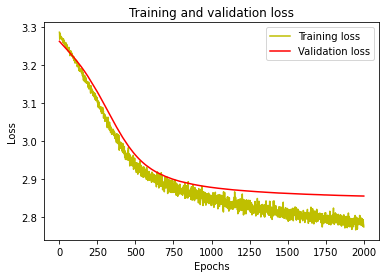

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
#plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
prediction_test = model.predict(X_test)

In [25]:
print(y_test, prediction_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0.10589928 0.09085308 0.08467733 ... 0.01065329 0.00766371 0.00718902]
 [0.1126647  0.10687517 0.08702063 ... 0.01041981 0.00782329 0.00651288]
 [0.11537144 0.10523286 0.08664666 ... 0.00999582 0.00751329 0.00650038]
 ...
 [0.10593299 0.1021721  0.08635135 ... 0.01150318 0.00855256 0.00720836]
 [0.11420742 0.1003056  0.08418889 ... 0.01122614 0.00833231 0.00717615]
 [0.11267528 0.09940912 0.08932337 ... 0.01058688 0.00695008 0.00640836]]


In [26]:
np.mean(prediction_test - y_test)**2

1.0991134815301432e-19

In [28]:
val_acc = history.history['val_accuracy']

In [29]:
val_acc

[0.00615384615957737,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02461538463830948,
 0.02461538463830948,
 0.02769230678677559,
 0.02769230678677559,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04923076927661896,
 0.04923076927661896,
 0.05538461357355118,
 0.05538461357355118,
 0.05538461357355118,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.0523076